In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.io import imsave, imshow
from astroExplain.image.neighbors import Neighbors

In [50]:
def mask_pertrubed_sps(
    segments: np.array, on_off_super_pixels: np.array
) -> np.array:
    """
    Obtain a mask with the number of the segment for perturbed
    super pixels. The non-perturbed super pixels has a segment
    number of zero. Remember that the number of the original
    segments range from 1 to the number of segments
    """
    new_segments = segments.copy()
    for idx_sp, on_off in enumerate(on_off_super_pixels):

        if on_off == 1:
            # segments range from 0 to the number of segments
            # that is why I use idx_sp + 1
            mask_on_sp = np.where(segments == idx_sp + 1, True, False)

            new_segments[mask_on_sp] = 0

    return new_segments

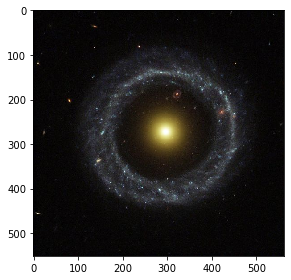

In [42]:
data = "/home/edgar/xai-astronomy/data/images"
# load data
image = plt.imread(f"{data}/weird.jpg") / 255.0
imshow(image)

In [43]:
slic_parameters = {"sigma": 16, "compactness": 10}
neighbors = Neighbors(
    image=image,
    number_segments=100,
    slic_parameters=slic_parameters,
    random_seed=0,
)

In [58]:
perturbed_images, on_off_sp_perturbation = neighbors.get_neighbors(10, None)

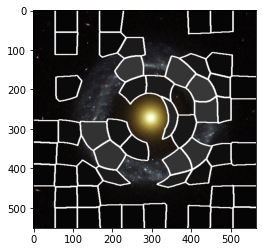

In [59]:
n = 2
new_segments = mask_pertrubed_sps(
    neighbors.segments, on_off_sp_perturbation[n]
)
image_with_boundaries = mark_boundaries(
    perturbed_images[n],
    new_segments,
    color=(1, 1, 1),
    outline_color=(1, 1, 1),
)
plt.imshow(image_with_boundaries)

In [65]:
save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"

for idx, perturbation in enumerate(perturbed_images[1:]):

    new_segments = mask_pertrubed_sps(
        neighbors.segments, on_off_sp_perturbation[idx + 1]
    )

    image_with_boundaries = mark_boundaries(
        perturbation,
        new_segments,
        color=(1, 1, 1),
        outline_color=(1, 1, 1),
    )

    # imshow(ngh_with_boundaries)

    fname = f"neighbor_{idx+1}_" f"segments_{100}_sigma_{16}_compactness_{10}"
    imsave(f"{save_to}/{fname}.png", image_with_boundaries)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0